# ANN for Neutron Stars

In [ ]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

# from tensorflow.python.client import device_lib
# print(device_lib.list_local_devices())

import pandas as pd
import numpy as np
import seaborn as sns
import keras
import time
# from google.colab import files
# import io
import matplotlib as mpl
import matplotlib.pyplot as plt
import myfunc

Num GPUs Available:  0


Read the data.

In [ ]:
df_alpha = pd.read_csv(r"C:\Users\Desktop\Giannis\EGB\alpha_list.csv")
alpha_list = list(df_alpha.a.values)

data = pd.read_csv(r"C:\Users\Desktop\Giannis\EGB\MRpa_data.csv")
data

,Unnamed: 0,M,R,p_c,a
0,0,0.337989,12.889804,0.100000,-0.4
1,1,0.343933,12.840271,0.102555,-0.4
2,2,0.349966,12.792721,0.105175,-0.4
3,3,0.356088,12.747087,0.107861,-0.4
4,4,0.362285,12.703496,0.110617,-0.4
...,...,...,...,...,...
10195,10195,2.661345,9.876440,21.375766,9.2
10196,10196,2.660851,9.842380,21.972021,9.2
10197,10197,2.660204,9.808243,22.584908,9.2
10198,10198,2.659405,9.774034,23.214891,9.2


Creating the best input data for my ANN: M, R, p_c in log

In [ ]:
data = myfunc.logdata(data     = data,
                      log_vars = ['p_c','M','R'],
                      lin_vars = ['a'])

data

,p_c,M,R,a
0,-1.000000,-0.471098,1.110246,-0.4
1,-0.989045,-0.463526,1.108574,-0.4
2,-0.978089,-0.455974,1.106963,-0.4
3,-0.967134,-0.448443,1.105411,-0.4
4,-0.956179,-0.440950,1.103923,-0.4
...,...,...,...,...
10195,1.329922,0.425101,0.994600,9.2
10196,1.341870,0.425021,0.993100,9.2
10197,1.353818,0.424915,0.991591,9.2
10198,1.365767,0.424784,0.990074,9.2


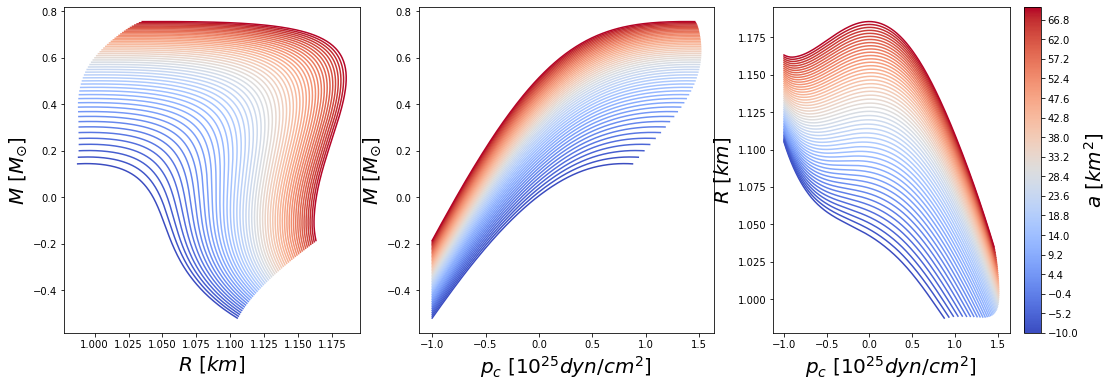

In [ ]:
# Units
units = {
    'M'  :'M_{\odot}',
    'R'  :'km',
    'p_c':'10^{25} dyn/cm^2'
}

df = data.copy()
# All linear
n_lines = int(len(df)/200)

a = alpha_list
clrs = a.copy()
clrs.sort()

norm = mpl.colors.Normalize(vmin=min(a), vmax=max(a))
cmap = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.coolwarm)
cmap.set_array([])

fig, ax = plt.subplots(1,3, figsize = (18,6))
for i in range(len(alpha_list)):
    temp = df[df['a'] == alpha_list[i]]
    
    r  = temp.R.values
    m  = temp.M.values
    pc = temp.p_c.values
    
    ax[0].plot(r, m, color=cmap.to_rgba(alpha_list[i]))
    # ax[0].tick_params(axis='both', which='major', labelsize=10)
    
    ax[1].plot(pc, m, color=cmap.to_rgba(alpha_list[i]))
    
    ax[2].plot(pc, r, color=cmap.to_rgba(alpha_list[i]))


cbar = fig.colorbar(cmap, ticks=clrs[::3])
cbar.set_label('$a$ [$km^2$]', fontsize = 20, rotation=90)

name = "$R$ [$"+units["R"]+"$]"
ax[0].set_xlabel(name, fontsize = 20)
name = "$M$ [$"+units["M"]+"$]"
ax[0].set_ylabel(name, fontsize = 20)

name = "$p_c$ [$"+units["p_c"]+"$]"
ax[1].set_xlabel(name, fontsize = 20)
name = "$M$ [$"+units["M"]+"$]"
ax[1].set_ylabel(name, fontsize = 20)

name = "$p_c$ [$"+units["p_c"]+"$]"
ax[2].set_xlabel(name, fontsize = 20)
name = "$R$ [$"+units["R"]+"$]"
ax[2].set_ylabel(name, fontsize = 20)

plt.show()


## First train for a single alpha

In [ ]:
alpha_list.sort()
temp = df[df['a'] == alpha_list[23]]
temp.reset_index(drop = True, inplace = True)
temp

,p_c,M,R,a
0,-1.000000,-0.348498,1.129117,26.8
1,-0.987421,-0.338819,1.127958,26.8
2,-0.974842,-0.329185,1.126872,26.8
3,-0.962263,-0.319575,1.125852,26.8
4,-0.949684,-0.310016,1.124898,26.8
...,...,...,...,...
195,1.452881,0.571498,1.004748,26.8
196,1.465460,0.571442,1.002764,26.8
197,1.478039,0.571368,1.000758,26.8
198,1.490618,0.571275,0.998732,26.8


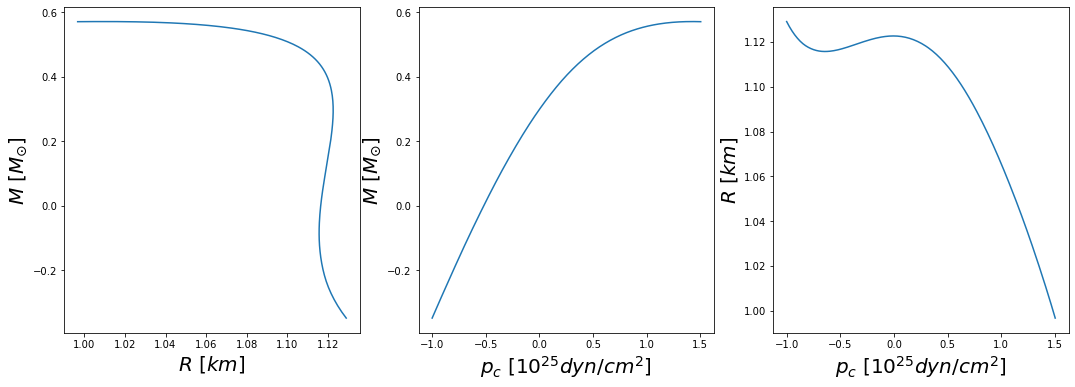

In [ ]:
fig, ax = plt.subplots(1,3, figsize = (18,6))

r  = temp.R.values
m  = temp.M.values
pc = temp.p_c.values

ax[0].plot(r, m)
# ax[0].tick_params(axis='both', which='major', labelsize=10)

ax[1].plot(pc, m)

ax[2].plot(pc, r)

name = "$R$ [$"+units["R"]+"$]"
ax[0].set_xlabel(name, fontsize = 20)
name = "$M$ [$"+units["M"]+"$]"
ax[0].set_ylabel(name, fontsize = 20)

name = "$p_c$ [$"+units["p_c"]+"$]"
ax[1].set_xlabel(name, fontsize = 20)
name = "$M$ [$"+units["M"]+"$]"
ax[1].set_ylabel(name, fontsize = 20)

name = "$p_c$ [$"+units["p_c"]+"$]"
ax[2].set_xlabel(name, fontsize = 20)
name = "$R$ [$"+units["R"]+"$]"
ax[2].set_ylabel(name, fontsize = 20)

plt.show()

In [ ]:
data = temp.copy()

Starting the ANN code!

In [ ]:
X_train, X_test, y_train, y_test, PredictorScalerFit, TargetVarScalerFit, three = myfunc.prepare(data,Predictors = ['p_c'], talk = True)

(140, 1)
(140, 2)
(60, 1)
(60, 2)


## Different Optimizers

Optimizer:  adam
2/2 [==============================] - 0s 2ms/step
MPD   :  0.069927  %
MAPE  :  0.137824  %


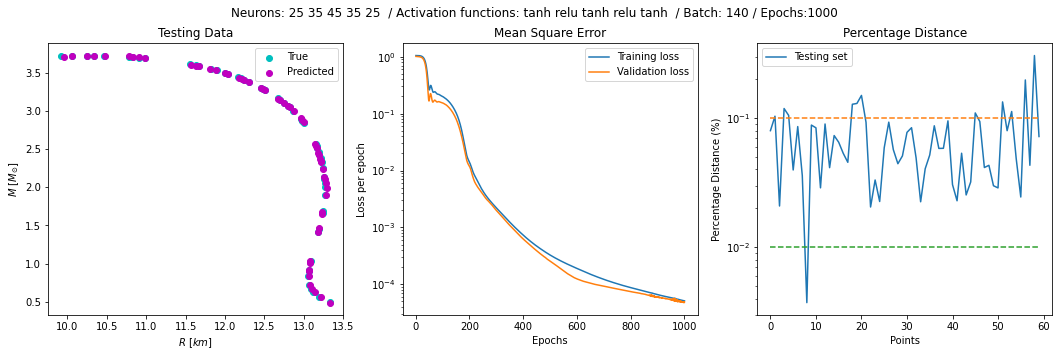

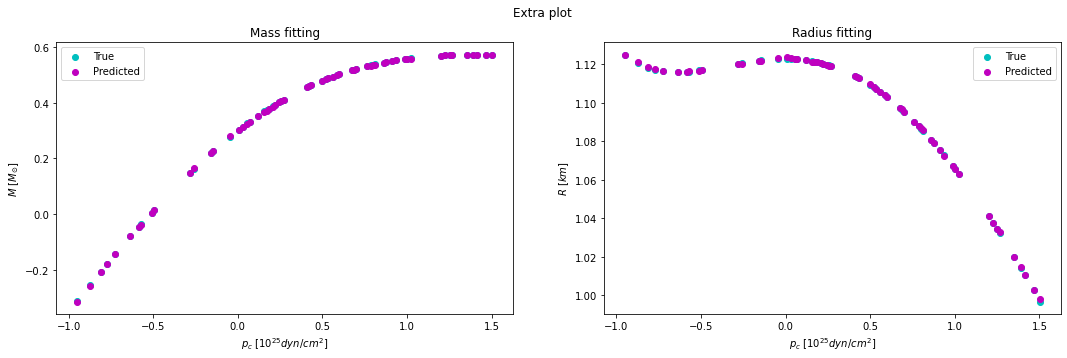

Optimizer:  adamax
2/2 [==============================] - 0s 4ms/step
MPD   :  0.195858  %
MAPE  :  0.340308  %


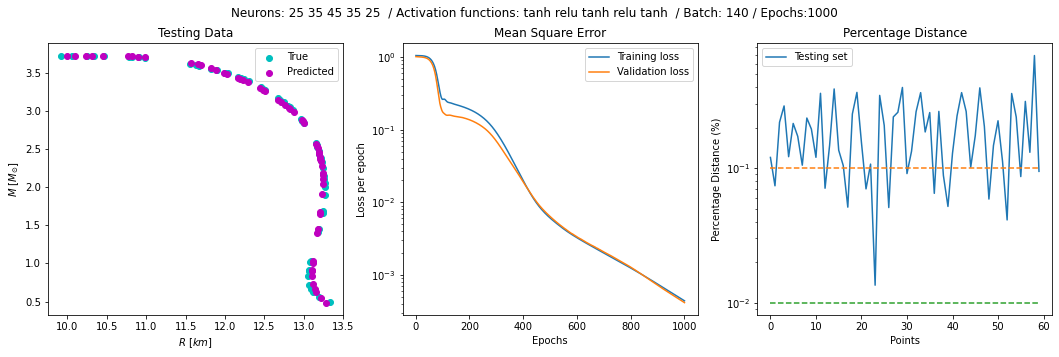

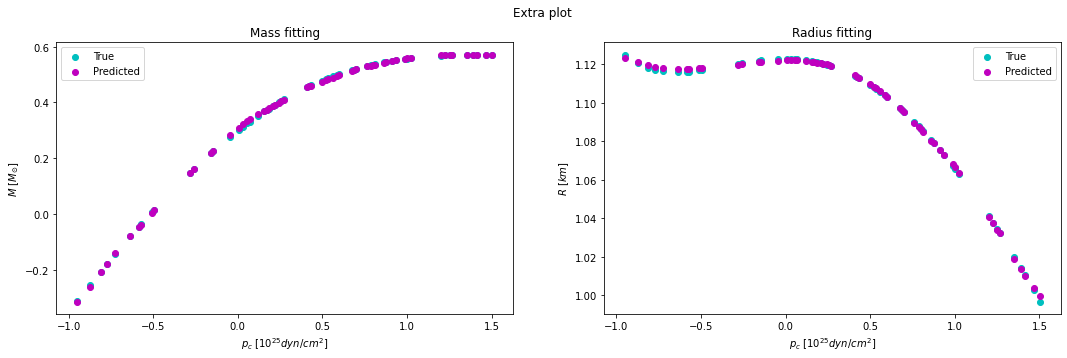

Optimizer:  nadam
2/2 [==============================] - 0s 3ms/step
MPD   :  0.165148  %
MAPE  :  0.501264  %


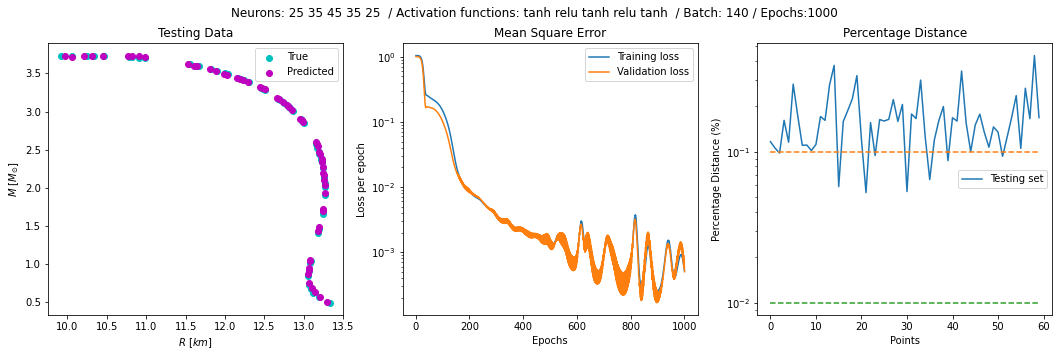

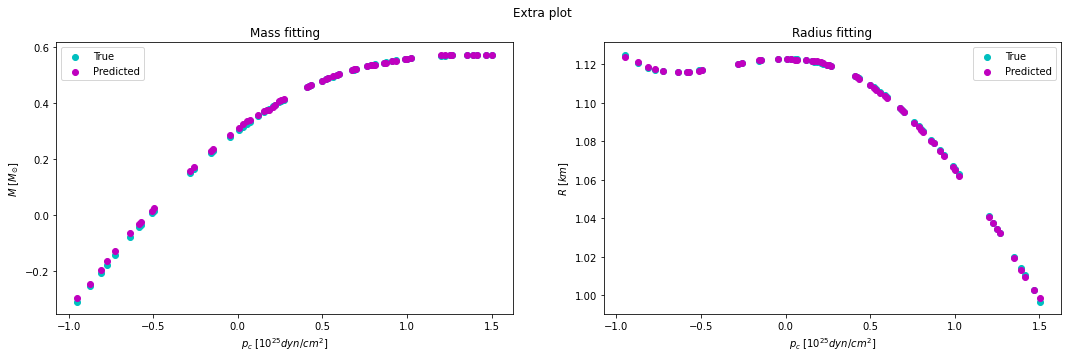

Optimizer:  rmsprop
2/2 [==============================] - 0s 2ms/step
MPD   :  0.424565  %
MAPE  :  0.639152  %


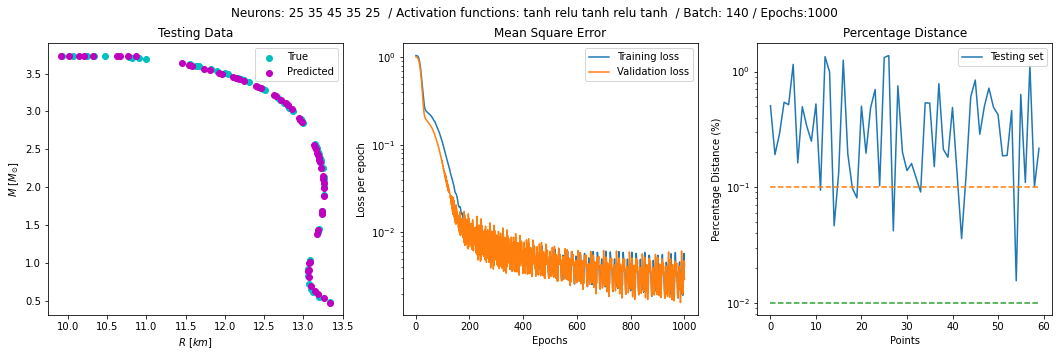

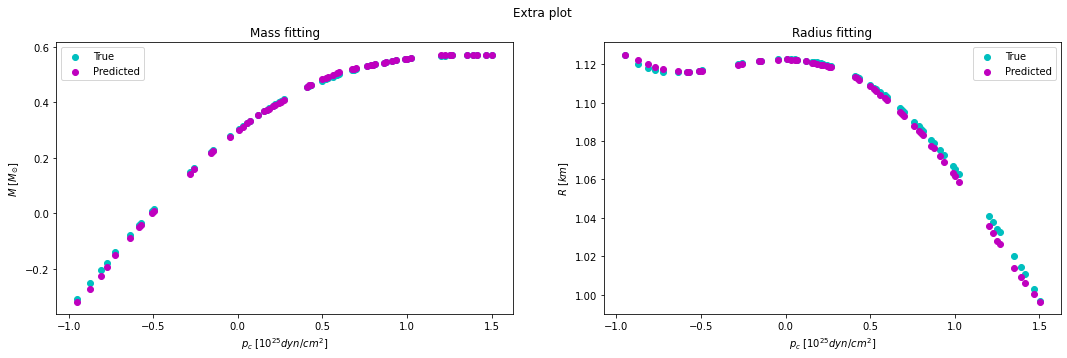

In [ ]:
optimizers = ['adam','adamax','nadam','rmsprop']
for optimizer in optimizers:
    print('Optimizer: ', optimizer)
    diction_1, dat_1, model_1 = myfunc.ann(  eps                  = 1000,
                                             bat                  = 140,
                                             layers               = 5,
                                             X_train              = X_train,
                                             y_train              = y_train,
                                             X_test               = X_test,
                                             y_test               = y_test,
                                             neur_list            = [25,35,45,35,25],
                                             activation_func_list = ['tanh','relu','tanh','relu','tanh'],
                                             timer                = True,
                                             performance          = True,
                                             show_plot            = True,
                                             show_extra_plot      = True,
                                             PredictorScalerFit   = PredictorScalerFit,
                                             TargetVarScalerFit   = TargetVarScalerFit,
                                             Predictors           = ['p_c'],
                                             optimizer            = optimizer)

Optimizer:  adamax
2/2 [==============================] - 0s 4ms/step
MPD   :  0.043472  %
MAPE  :  0.095072  %


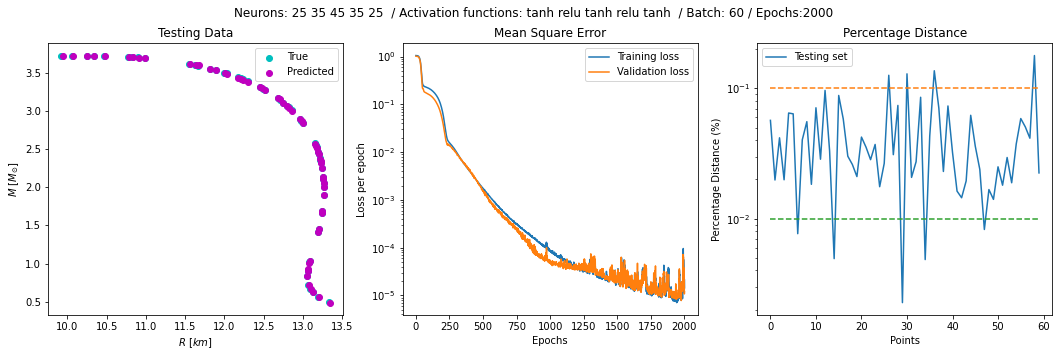

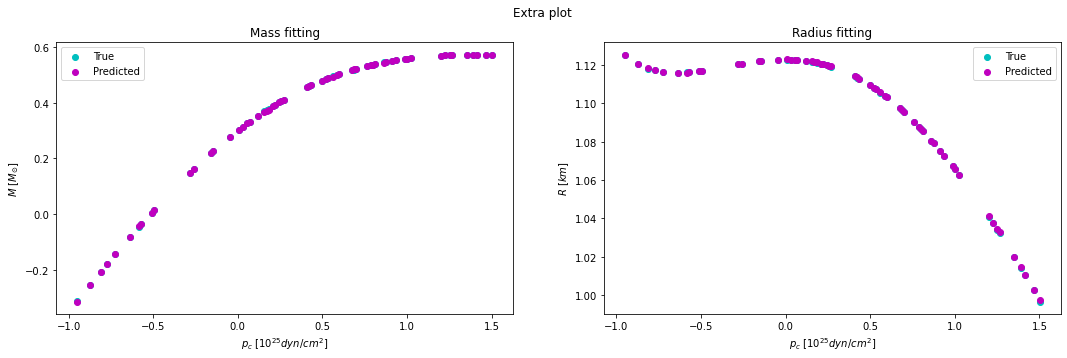

In [ ]:
optimizers = ['adamax']
for optimizer in optimizers:
    print('Optimizer: ', optimizer)
    diction_1, dat_1, model_1 = myfunc.ann(  eps                  = 2000,
                                             bat                  = 60,
                                             layers               = 5,
                                             X_train              = X_train,
                                             y_train              = y_train,
                                             X_test               = X_test,
                                             y_test               = y_test,
                                             neur_list            = [25,35,45,35,25],
                                             activation_func_list = ['tanh','relu','tanh','relu','tanh'],
                                             timer                = True,
                                             performance          = True,
                                             show_plot            = True,
                                             show_extra_plot      = True,
                                             PredictorScalerFit   = PredictorScalerFit,
                                             TargetVarScalerFit   = TargetVarScalerFit,
                                             Predictors           = ['p_c'],
                                             optimizer            = optimizer)

2/2 [==============================] - 0s 3ms/step
MPD   :  0.233759  %
MAPE  :  0.499226  %


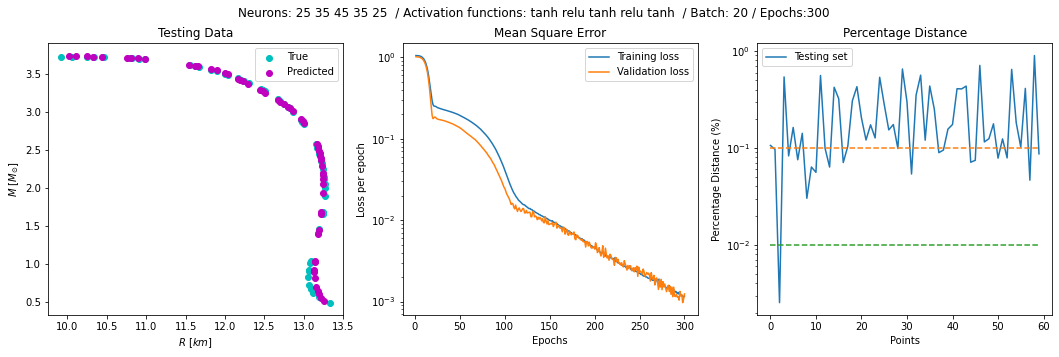

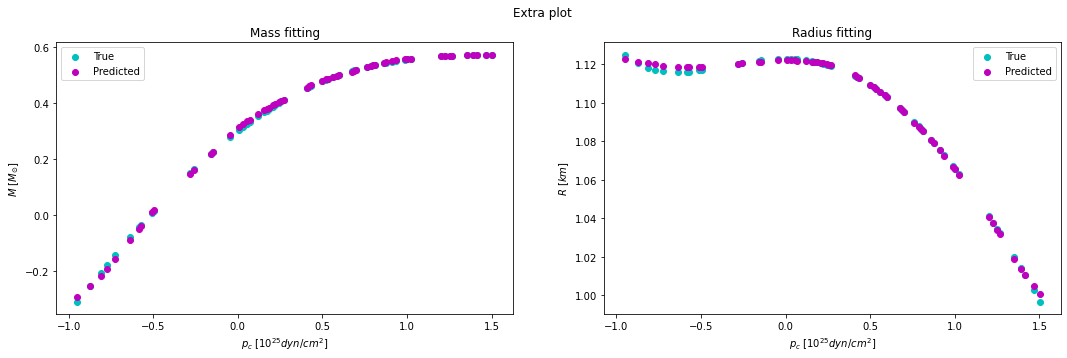

2/2 [==============================] - 0s 2ms/step
MPD   :  1.003469  %
MAPE  :  2.40489  %


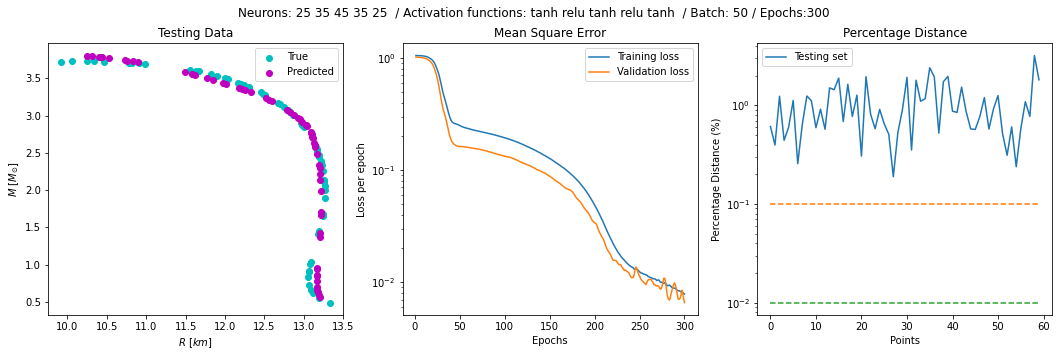

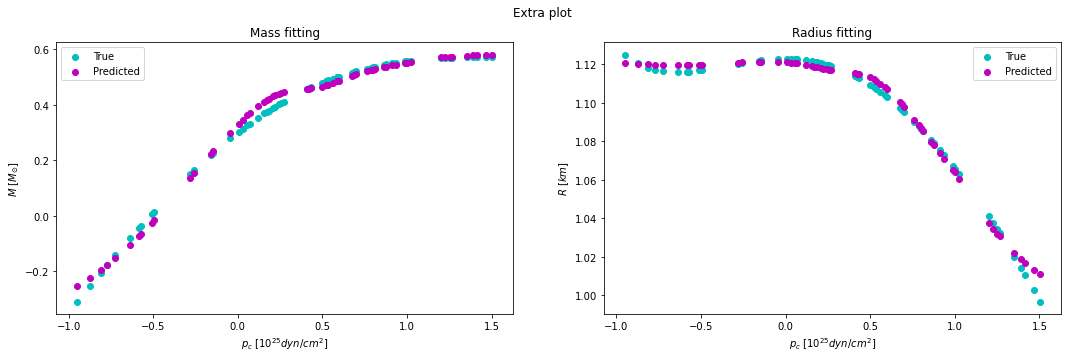

2/2 [==============================] - 0s 2ms/step
MPD   :  0.916174  %
MAPE  :  1.935472  %


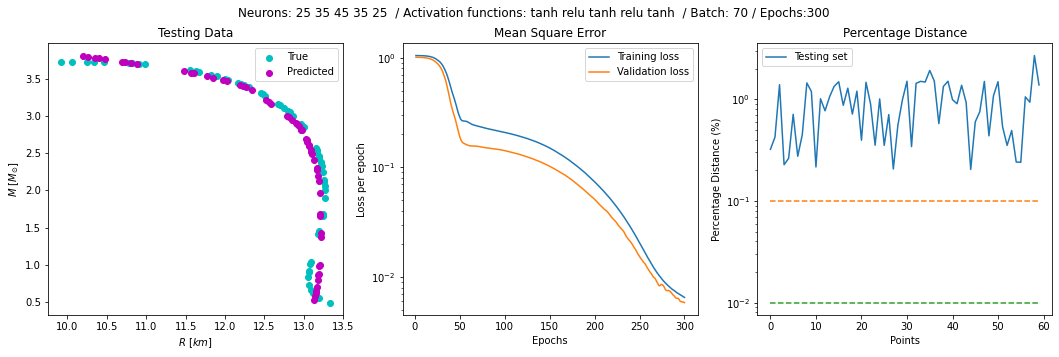

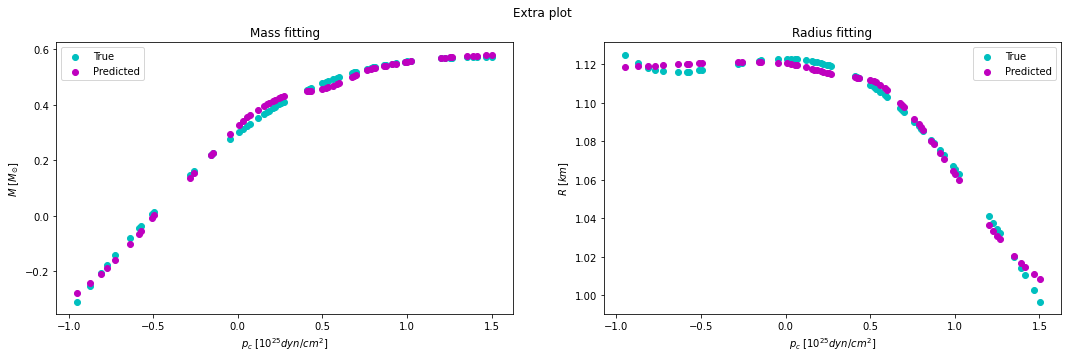

2/2 [==============================] - 0s 3ms/step
MPD   :  4.053745  %
MAPE  :  9.508823  %


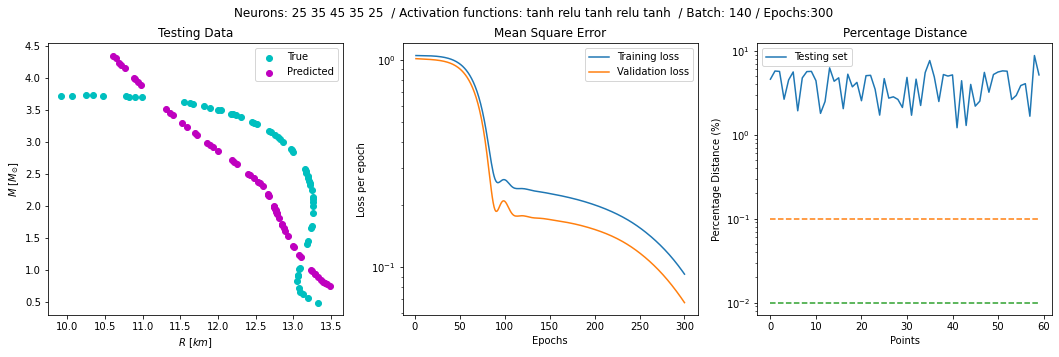

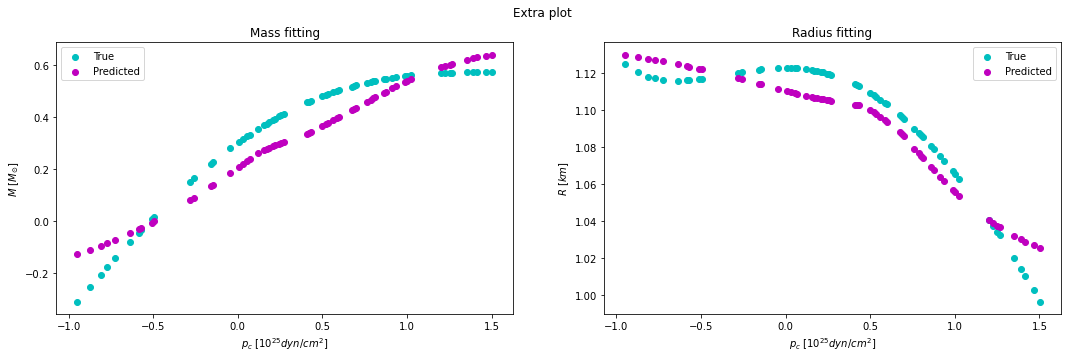

2/2 [==============================] - 0s 2ms/step
MPD   :  0.072294  %
MAPE  :  0.139291  %


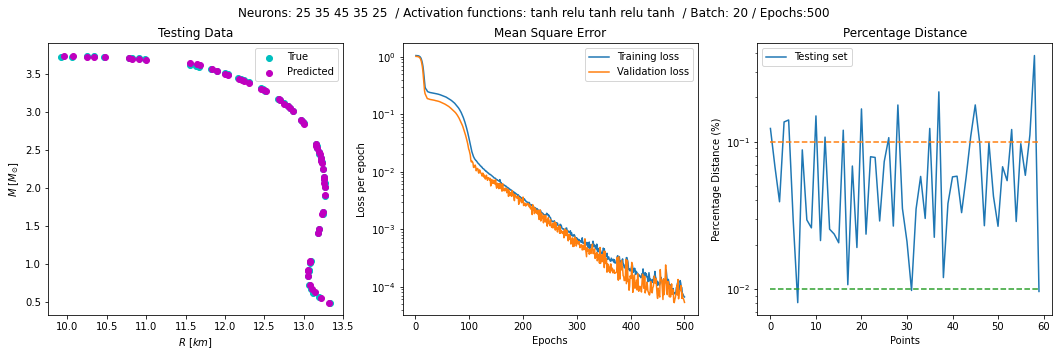

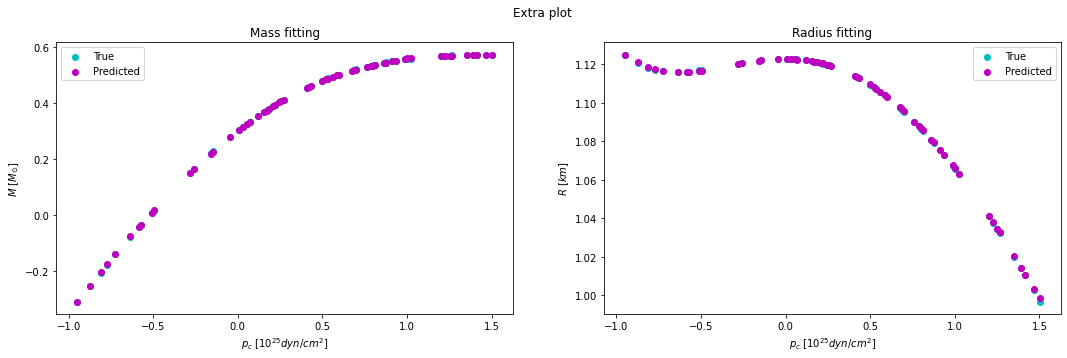

2/2 [==============================] - 0s 2ms/step
MPD   :  0.312143  %
MAPE  :  0.624091  %


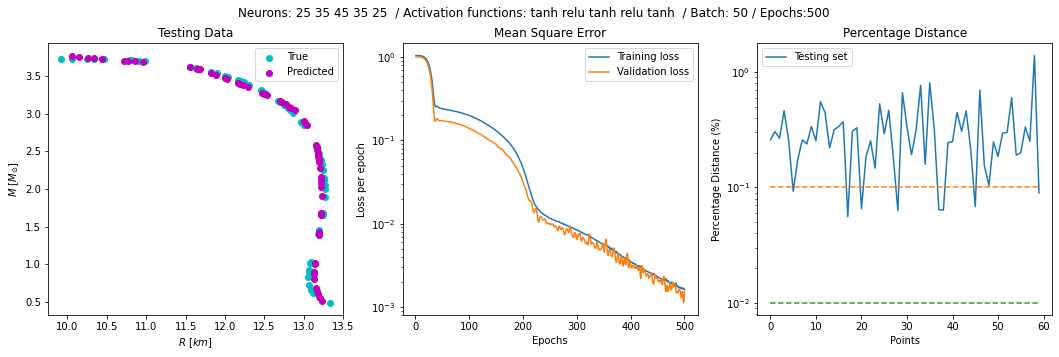

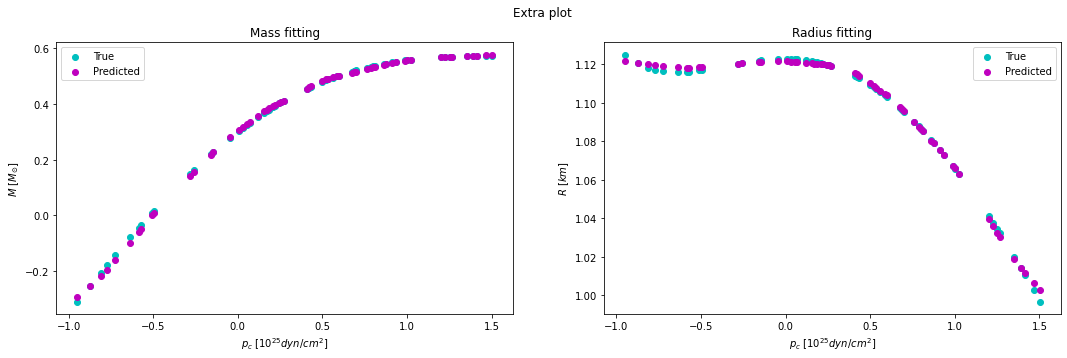

2/2 [==============================] - 0s 2ms/step
MPD   :  0.340217  %
MAPE  :  0.532702  %


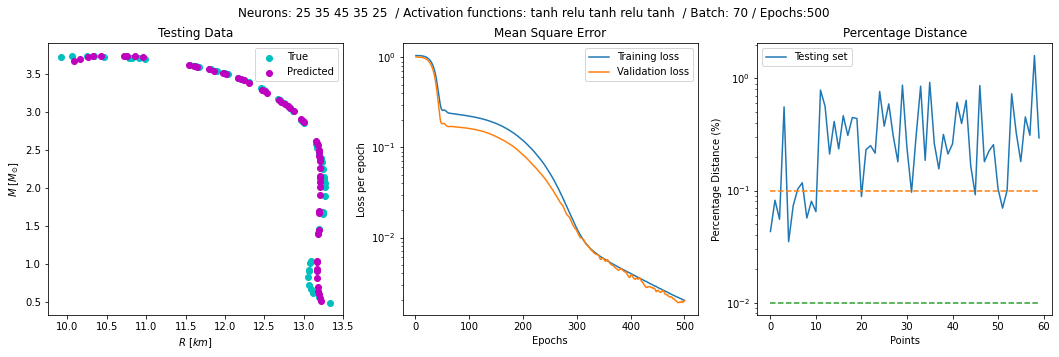

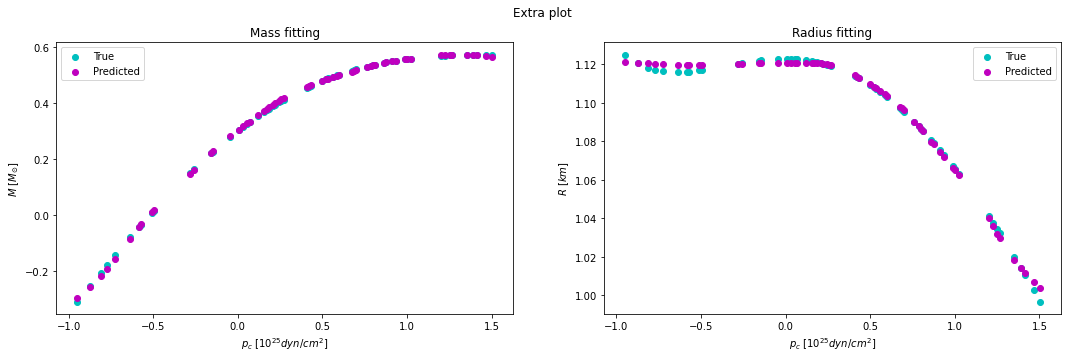

2/2 [==============================] - 0s 2ms/step
MPD   :  0.774029  %
MAPE  :  2.010679  %


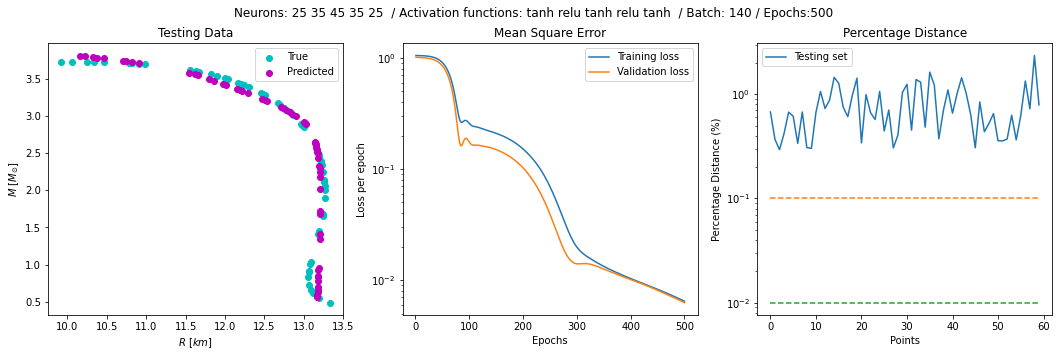

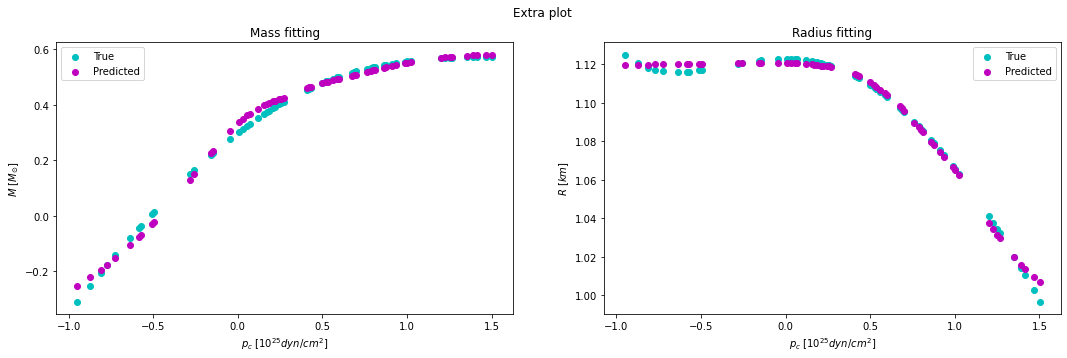

2/2 [==============================] - 0s 2ms/step
MPD   :  0.042162  %
MAPE  :  0.11209  %


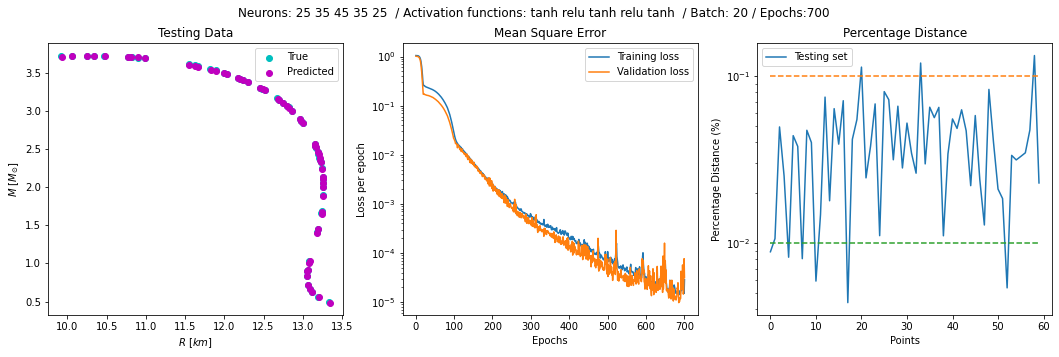

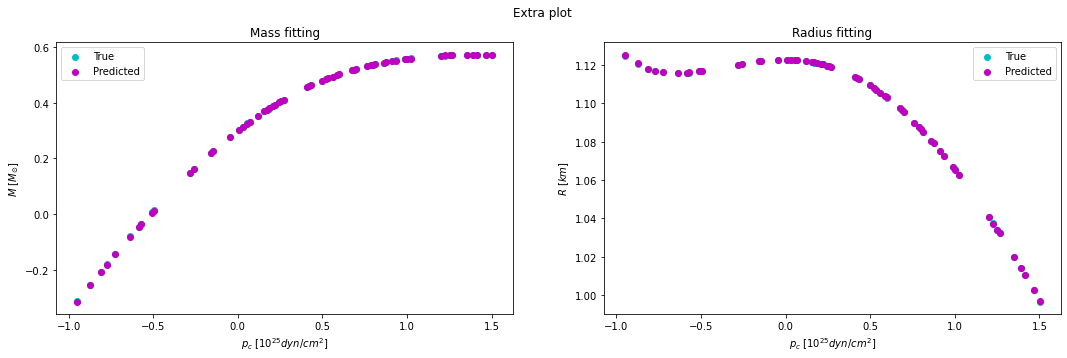

2/2 [==============================] - 0s 3ms/step
MPD   :  0.10518  %
MAPE  :  0.254287  %


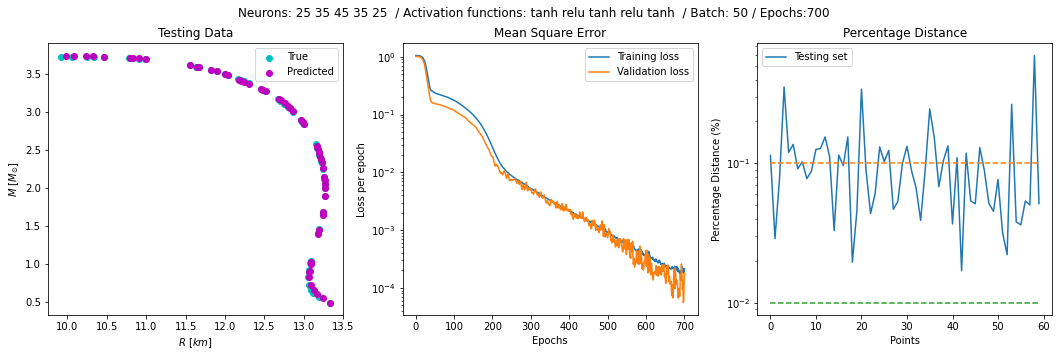

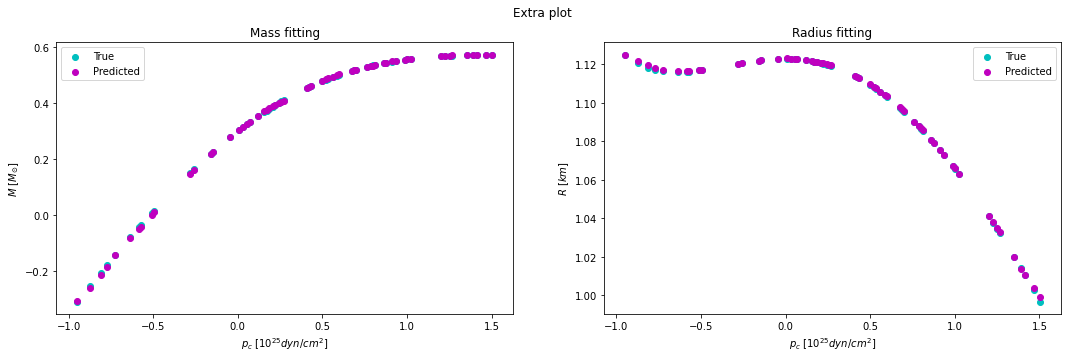

2/2 [==============================] - 0s 2ms/step
MPD   :  0.141814  %
MAPE  :  0.278062  %


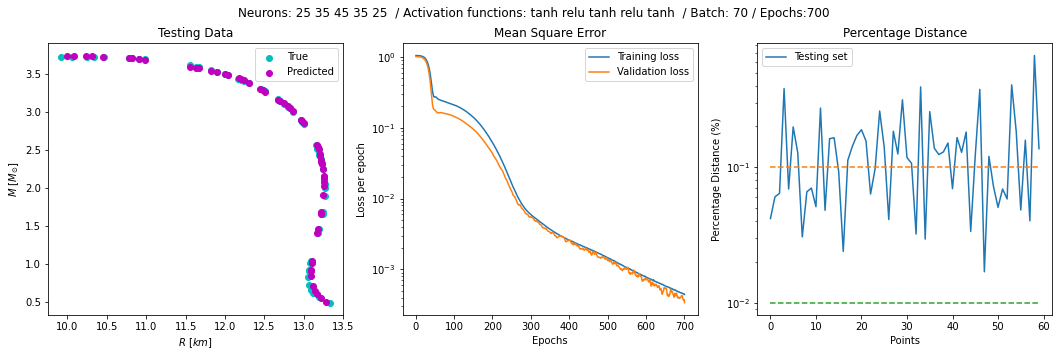

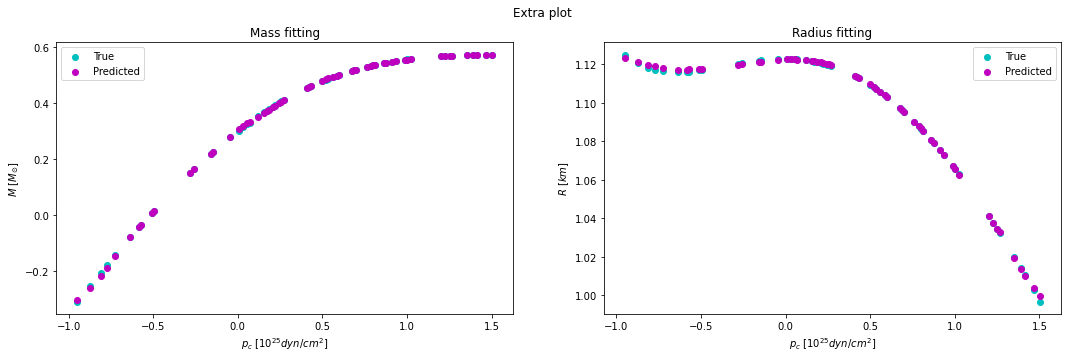

2/2 [==============================] - 0s 3ms/step
MPD   :  0.383093  %
MAPE  :  0.784663  %


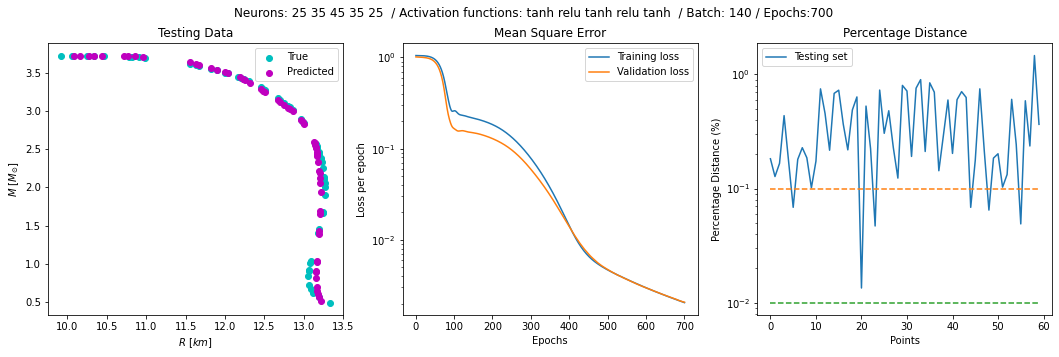

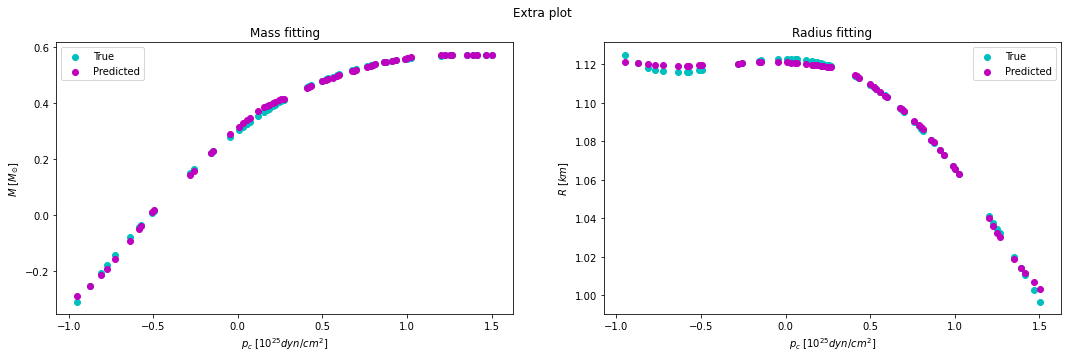

2/2 [==============================] - 0s 3ms/step
MPD   :  0.040165  %
MAPE  :  0.070707  %


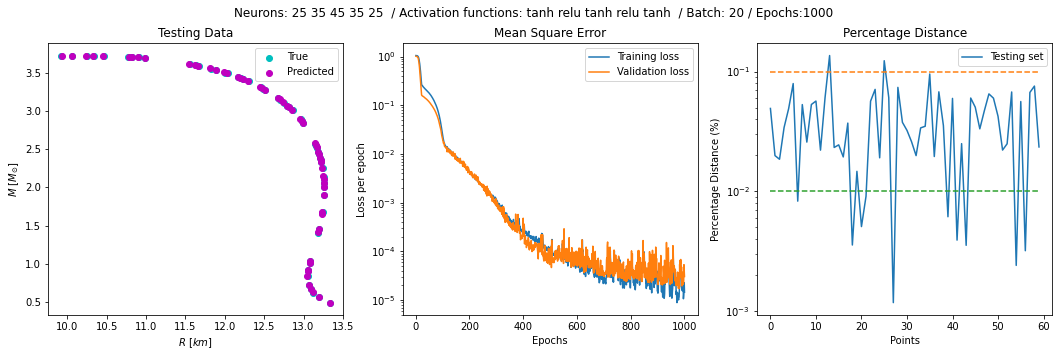

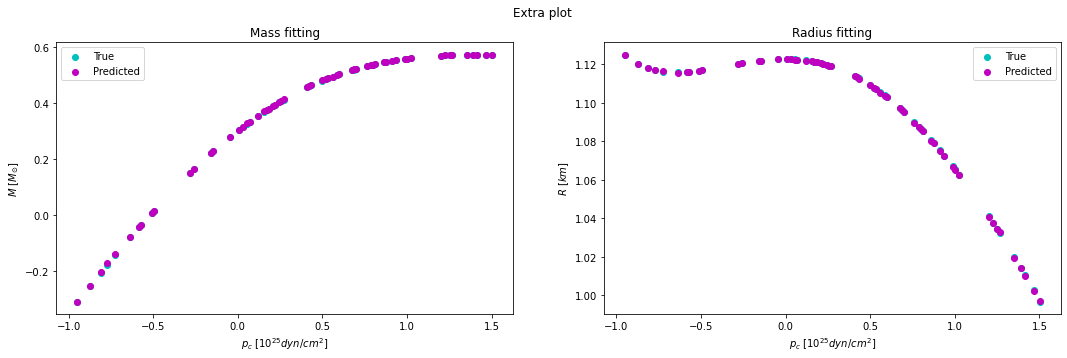

2/2 [==============================] - 0s 4ms/step
MPD   :  0.045193  %
MAPE  :  0.113458  %


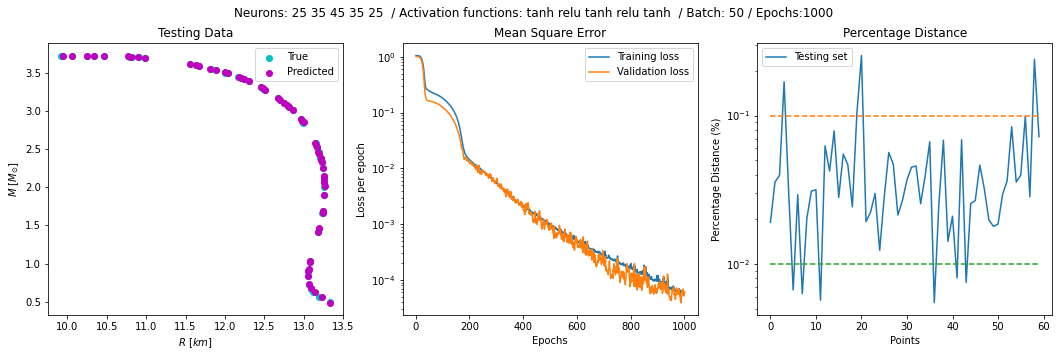

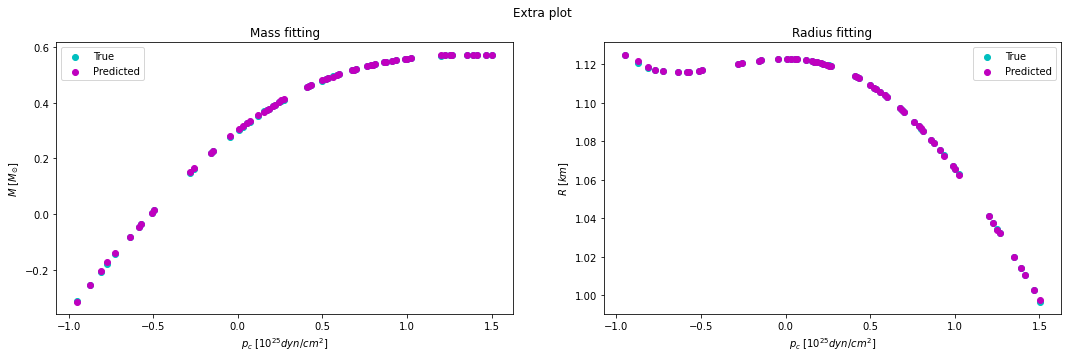

2/2 [==============================] - 0s 3ms/step
MPD   :  0.095777  %
MAPE  :  0.174605  %


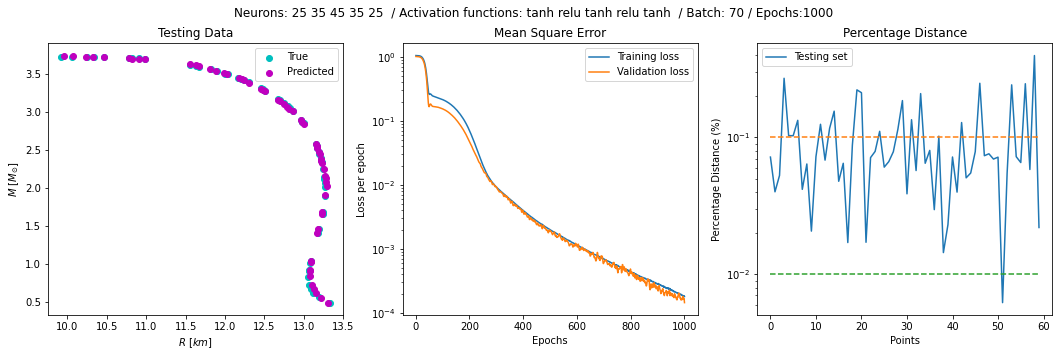

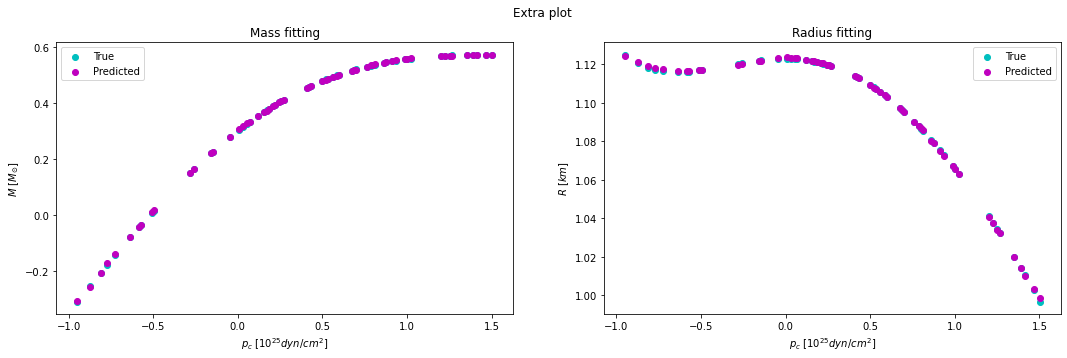

2/2 [==============================] - 0s 2ms/step
MPD   :  0.165831  %
MAPE  :  0.364477  %


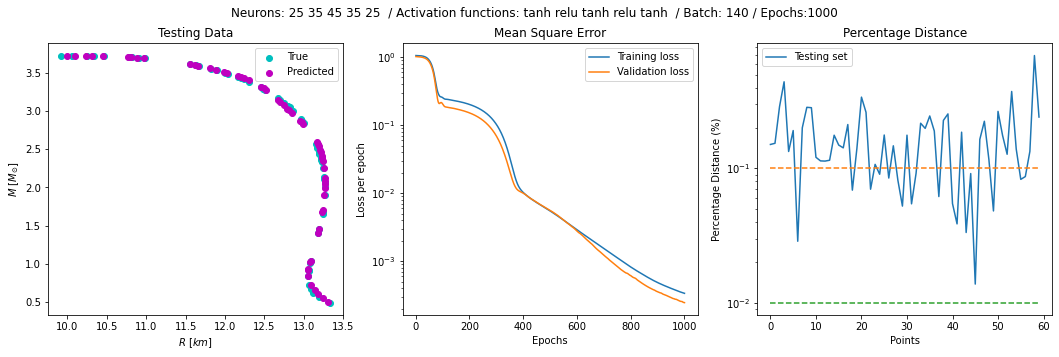

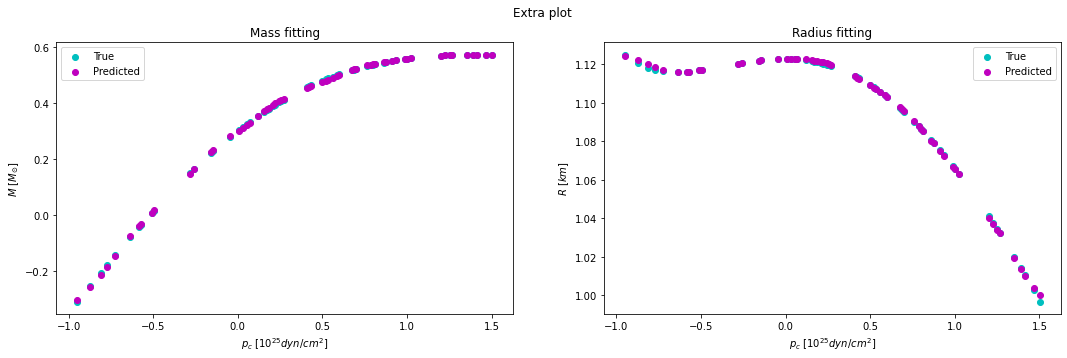

2/2 [==============================] - 0s 3ms/step
MPD   :  0.024524  %
MAPE  :  0.062767  %


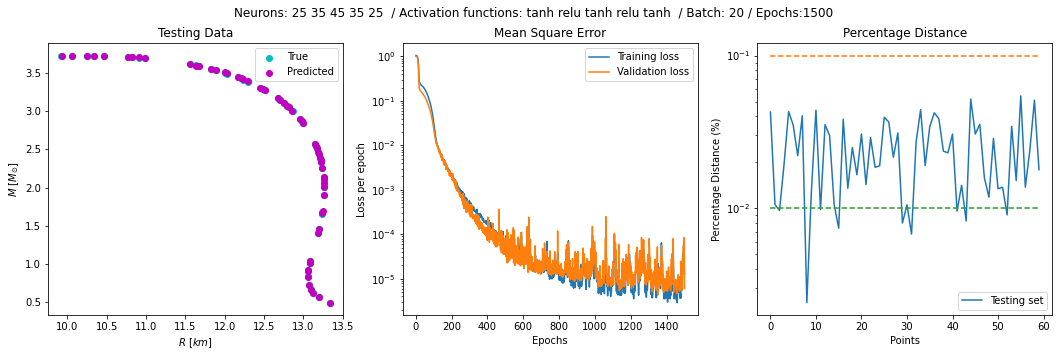

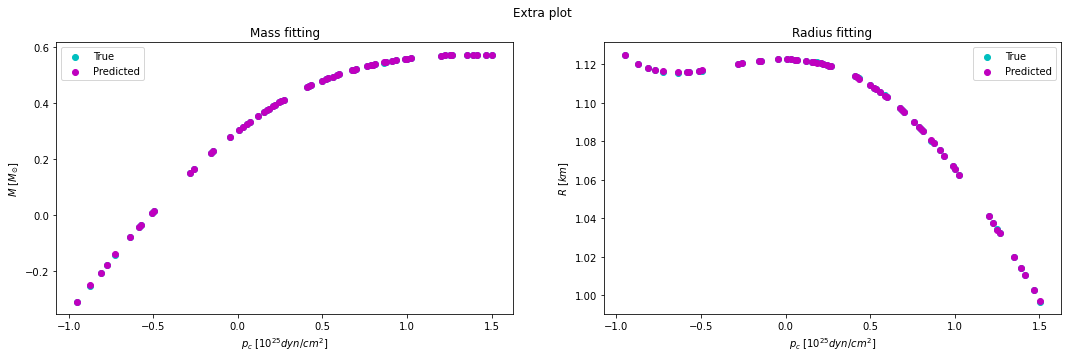

2/2 [==============================] - 0s 3ms/step
MPD   :  0.039374  %
MAPE  :  0.081366  %


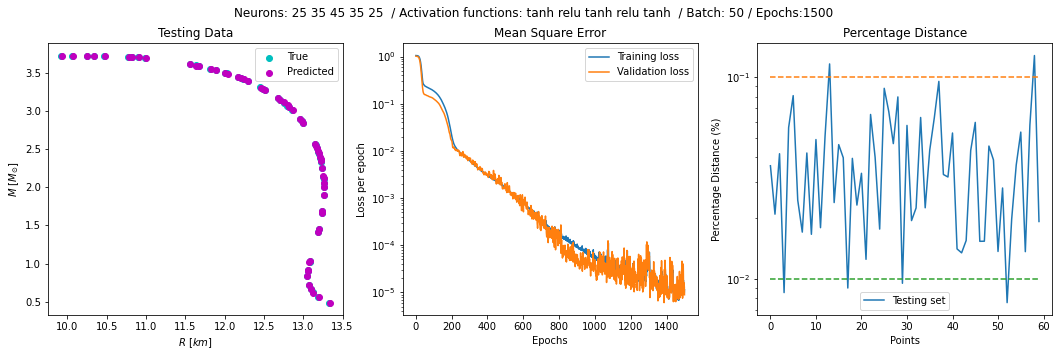

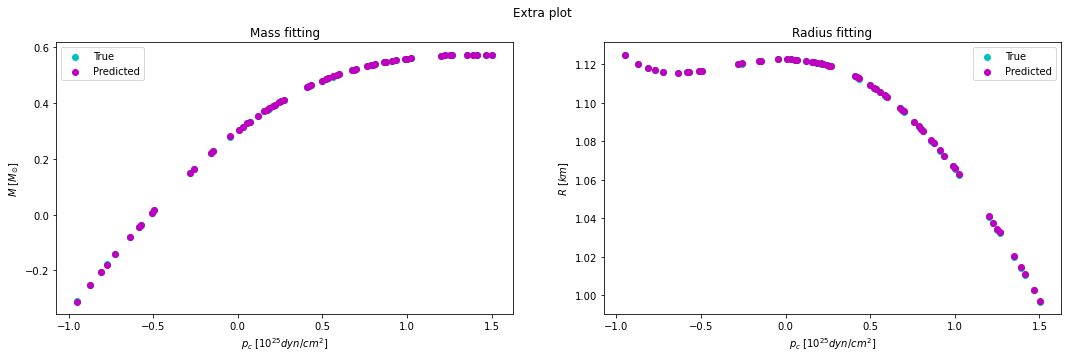

2/2 [==============================] - 0s 3ms/step
MPD   :  0.060104  %
MAPE  :  0.115326  %


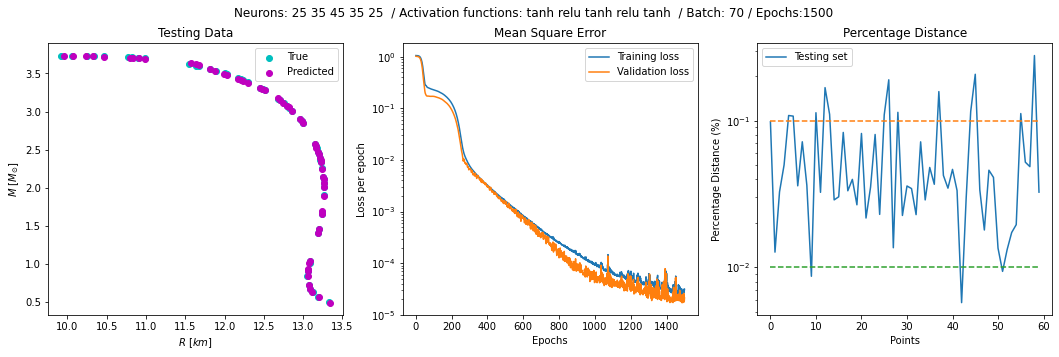

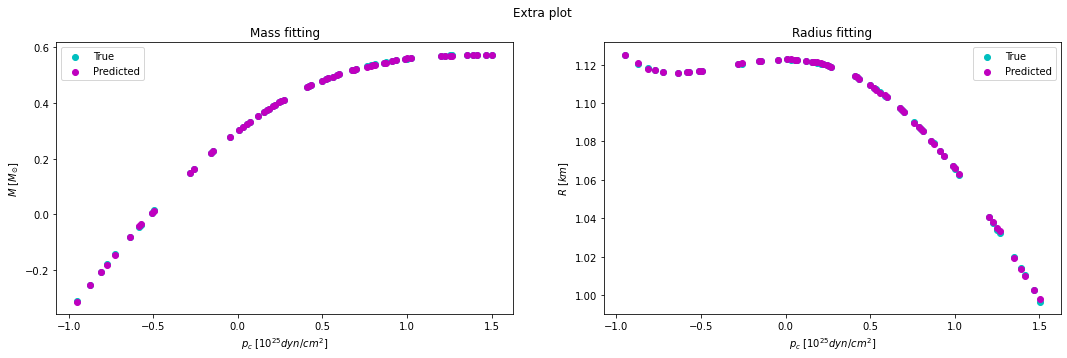

2/2 [==============================] - 0s 2ms/step
MPD   :  0.083456  %
MAPE  :  0.196347  %


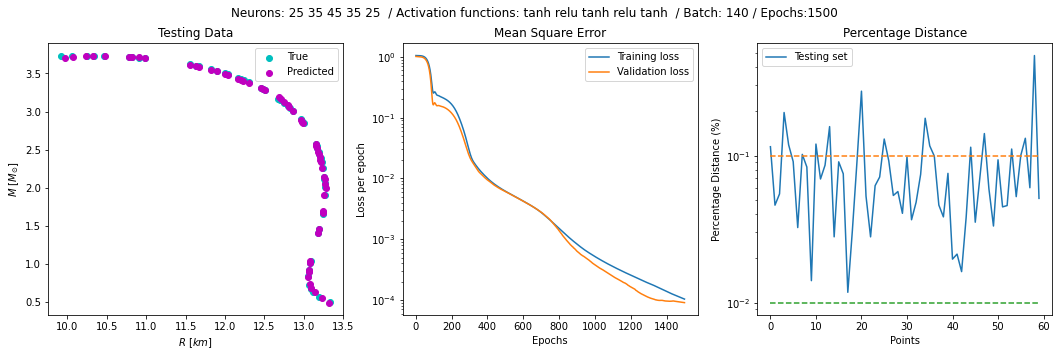

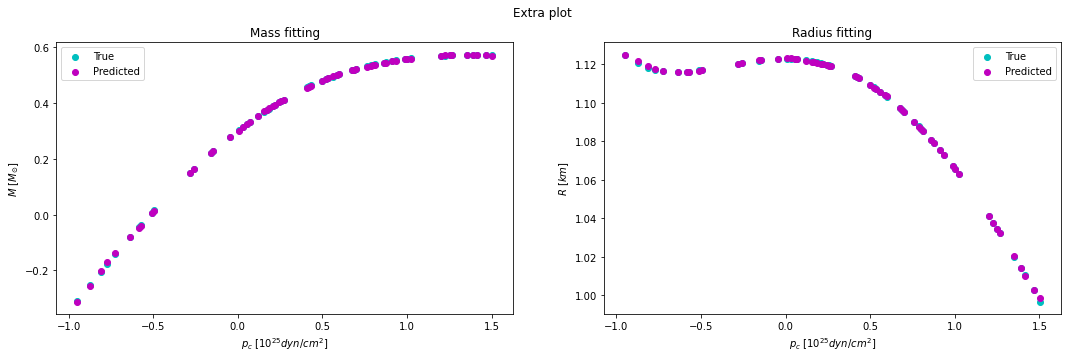

In [ ]:
ep_list = [300,500,700,1000,1500]
ba_list = [20,50,70,140]
for ep in ep_list:
    for ba in ba_list:
#         print('Optimizer: ', optimizer)
        diction_1, dat_1, model_1 = myfunc.ann(  eps                  = ep,
                                                 bat                  = ba,
                                                 layers               = 5,
                                                 X_train              = X_train,
                                                 y_train              = y_train,
                                                 X_test               = X_test,
                                                 y_test               = y_test,
                                                 neur_list            = [25,35,45,35,25],
                                                 activation_func_list = ['tanh','relu','tanh','relu','tanh'],
                                                 timer                = True,
                                                 performance          = True,
                                                 show_plot            = True,
                                                 show_extra_plot      = True,
                                                 PredictorScalerFit   = PredictorScalerFit,
                                                 TargetVarScalerFit   = TargetVarScalerFit,
                                                 Predictors           = ['p_c'],
                                                 optimizer            = 'adamax')

2/2 [==============================] - 0s 3ms/step
MPD   :  0.04982  %
MAPE  :  0.092178  %


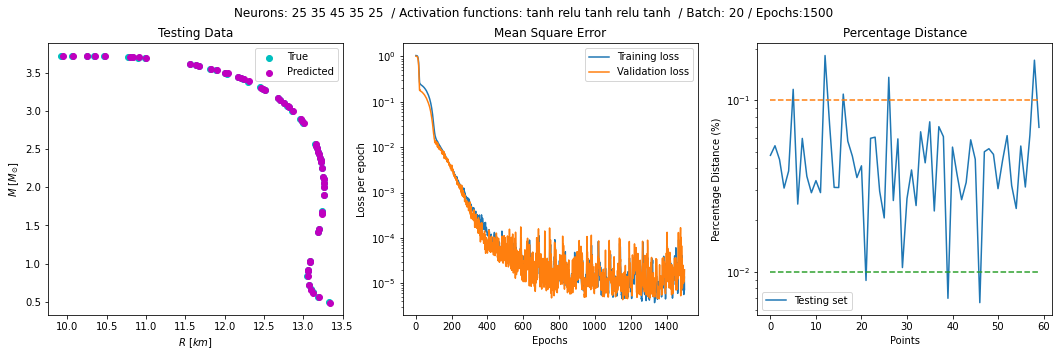

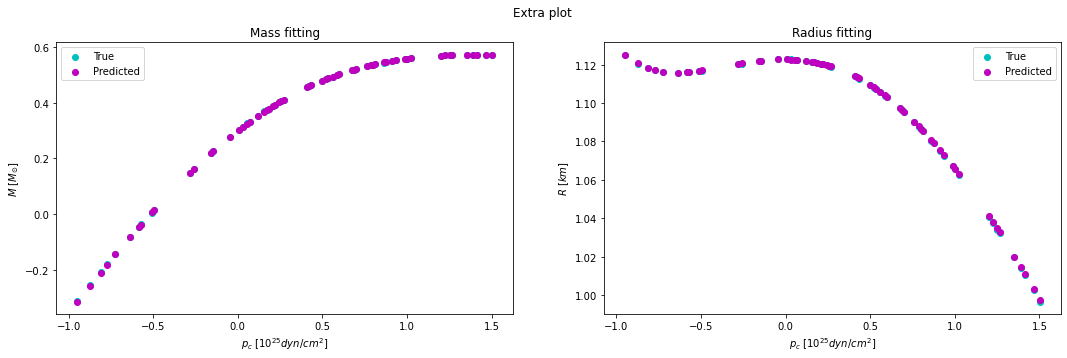

In [ ]:
ep_list = [1500]
ba_list = [20]
for ep in ep_list:
    for ba in ba_list:
#         print('Optimizer: ', optimizer)
        diction_1, dat_1, model_1 = myfunc.ann(  eps                  = ep,
                                                 bat                  = ba,
                                                 layers               = 5,
                                                 X_train              = X_train,
                                                 y_train              = y_train,
                                                 X_test               = X_test,
                                                 y_test               = y_test,
                                                 neur_list            = [25,35,45,35,25],
                                                 activation_func_list = ['tanh','relu','tanh','relu','tanh'],
                                                 timer                = True,
                                                 performance          = True,
                                                 show_plot            = True,
                                                 show_extra_plot      = True,
                                                 PredictorScalerFit   = PredictorScalerFit,
                                                 TargetVarScalerFit   = TargetVarScalerFit,
                                                 Predictors           = ['p_c'],
                                                 optimizer            = 'adamax')

In [ ]:
diction_1

{'MPD': [0.04981989347495505],
 'MAPE_R': [0.04199938789033981],
 'MAPE_M': [0.1423558067054471],
 'MAPE': [0.09217759729789345],
 'Max_PD': [0.1821539245759821],
 'Fin_Val_loss': [1.9916189557989128e-05],
 'Fin_Train_loss': [7.26157531971694e-06],
 'Min_Val_loss': [[4.355075361672789e-06, 1154]],
 'Min_Train_loss': [[3.7489414808078436e-06, 1332]],
 'Exe_time': [66.4551317691803],
 'eps': [1500],
 'bat': [20],
 'neur_list': [[25, 35, 45, 35, 25]],
 'activation_func_list': [['tanh', 'relu', 'tanh', 'relu', 'tanh']]}

7/7 [==============================] - 0s 2ms/step


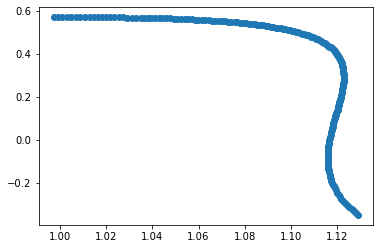

In [ ]:


new_in = np.array([temp.p_c.values]).T

new_in = PredictorScalerFit.transform(new_in)

dedomena = model_1.predict(new_in)
dedomena = TargetVarScalerFit.inverse_transform(dedomena)
# dedomena = 10**dedomena

plt.scatter(dedomena.T[1], dedomena.T[0])

In [ ]:
temp

,p_c,M,R,a
0,-1.000000,-0.348498,1.129117,26.8
1,-0.987421,-0.338819,1.127958,26.8
2,-0.974842,-0.329185,1.126872,26.8
3,-0.962263,-0.319575,1.125852,26.8
4,-0.949684,-0.310016,1.124898,26.8
...,...,...,...,...
195,1.452881,0.571498,1.004748,26.8
196,1.465460,0.571442,1.002764,26.8
197,1.478039,0.571368,1.000758,26.8
198,1.490618,0.571275,0.998732,26.8


In [ ]:
temp_1 = temp.copy()

temp_1['M'] = 10**(200*(temp_1['M'].values - dedomena.T[0]))
temp_1['R'] = 10**(200*(temp_1['R'].values - dedomena.T[1]))

# temp_1['M'] = (10000*(temp_1['M'].values - dedomena.T[0]))
# temp_1['R'] = (10000*(temp_1['R'].values - dedomena.T[1]))
temp_1

,p_c,M,R,a
0,-1.000000,1.339339,1.090181,26.8
1,-0.987421,2.127283,0.983172,26.8
2,-0.974842,2.668420,0.922493,26.8
3,-0.962263,2.844463,0.894104,26.8
4,-0.949684,2.528045,0.895305,26.8
...,...,...,...,...
195,1.452881,0.893302,0.836371,26.8
196,1.465460,0.882419,0.842467,26.8
197,1.478039,0.855887,0.818017,26.8
198,1.490618,0.814819,0.765622,26.8


In [ ]:
X_train_1, X_test_1, y_train_1, y_test_1, PredictorScalerFit_1, TargetVarScalerFit_1, three_1 = myfunc.prepare(temp_1, Predictors = ['p_c'], talk = True)

(140, 1)
(140, 2)
(60, 1)
(60, 2)


2/2 [==============================] - 0s 5ms/step
MPD   :  47.607767  %
MAPE  :  35.580701  %


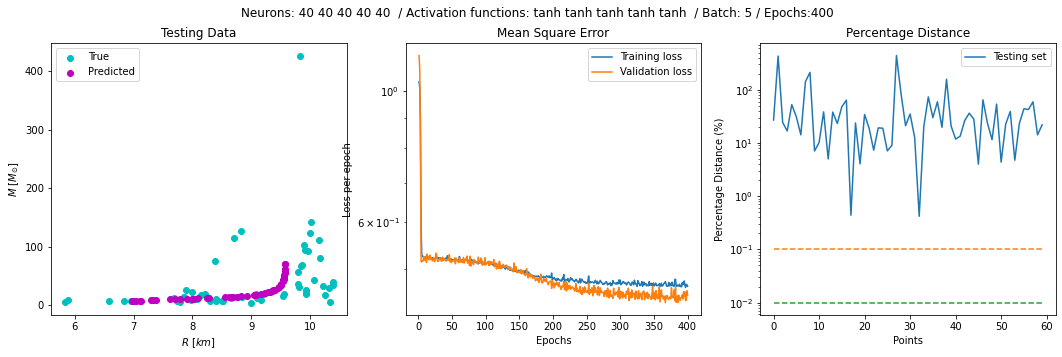

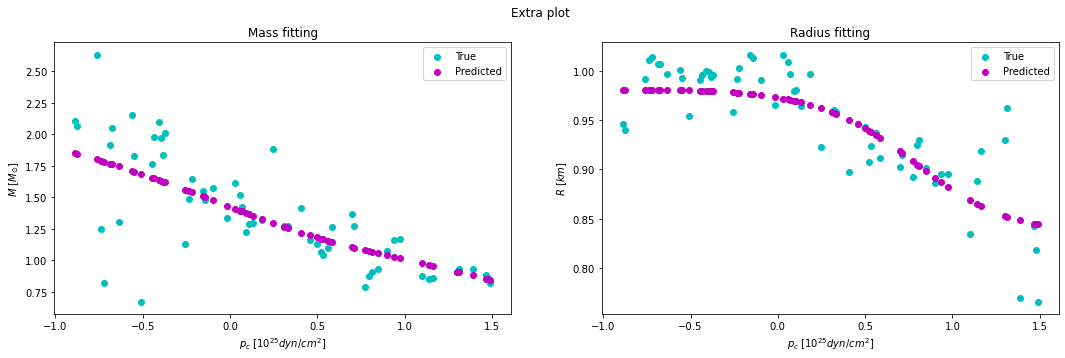

In [ ]:
diction_2, dat_2, model_2 = myfunc.ann(  eps                  = 400,
                                         bat                  = 5,
                                         layers               = 5,
                                         X_train              = X_train_1,
                                         y_train              = y_train_1,
                                         X_test               = X_test_1,
                                         y_test               = y_test_1,
                                         neur_list            = [40,40,40,40,40],
                                         activation_func_list = ['tanh','tanh','tanh','tanh','tanh'],
                                         timer                = True,
                                         performance          = True,
                                         show_plot            = True,
                                         show_extra_plot      = True,
                                         PredictorScalerFit   = PredictorScalerFit_1,
                                         TargetVarScalerFit   = TargetVarScalerFit_1,
                                         Predictors           = ['p_c'],
                                         optimizer            = 'adamax')

7/7 [==============================] - 0s 1ms/step


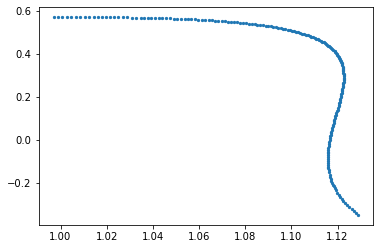

In [ ]:
new_in = np.array([temp.p_c.values]).T

new_in = PredictorScalerFit_1.transform(new_in)

dedomena_1 = model_1.predict(new_in)
dedomena_1 = TargetVarScalerFit.inverse_transform(dedomena_1)
# dedomena = 10**dedomena

dedomena_2 = model_2.predict(new_in)
dedomena_2 = TargetVarScalerFit_1.inverse_transform(dedomena_2)

dedomena = dedomena_1 + np.log10(dedomena_2)/200

# dedomena = dedomena_1 + (dedomena_2)/10000

plt.scatter(dedomena.T[1], dedomena.T[0], s = 5)

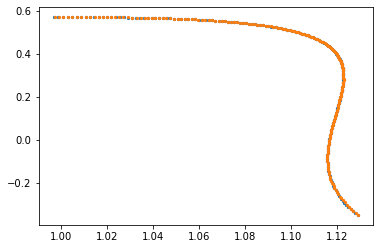

In [ ]:
x1 = temp.R.values
y1 = temp.M.values

x2 = dedomena.T[1]
y2 = dedomena.T[0]

x3 = dedomena_1.T[1]
y3 = dedomena_1.T[0]

plt.scatter(x1, y1, s = 5)
plt.scatter(x2, y2, s = 5)
# plt.scatter(x3, y3, s = 5)


**Careful**: This is the MAPE for EVERY data point

In [ ]:
# MAPE_R
mape_R_t = 100*np.mean(np.abs((10**x1 - 10**x2)/(10**x1)))
mape_R = 100*np.mean(np.abs((10**x1 - 10**x3)/(10**x1)))

# MAPE_M
mape_M_t = 100*np.mean(np.abs((10**y1 - 10**y2)/(10**y1)))
mape_M = 100*np.mean(np.abs((10**y1 - 10**y3)/(10**y1)))

print("MAPE for original: \t ",round(mape_R,6)  , '% \t' , round(mape_M,6)  , '%')
print("MAPE for trick: \t ",   round(mape_R_t,6), '% \t' , round(mape_M_t,6), '%')

MAPE for original: 	  0.033772 % 	 0.149175 %
MAPE for trick: 	  0.014682 % 	 0.075423 %


In [ ]:
(mape_R + mape_M)/2

0.09147336766358728

In [ ]:
# def best_model(X_train, X_test, y_train, y_test, PredictorScalerFit, TargetVarScalerFit):
#     dictio = myfunc.ann( eps                  = 400,
#                          bat                  = 20,
#                          layers               = 5,
#                          X_train              = X_train,
#                          y_train              = y_train,
#                          X_test               = X_test,
#                          y_test               = y_test,
#                          neur_list            = [25, 35, 45, 35, 25],
#                          activation_func_list = ['tanh', 'relu', 'tanh', 'relu', 'tanh'],
#                          timer                = True,
#                          performance          = True,
#                          show_plot            = True,
#                          show_extra_plot      = True,
#                          PredictorScalerFit   = PredictorScalerFit,
#                          TargetVarScalerFit   = TargetVarScalerFit,
#                          Predictors           = ['p_c'])
#     return dictio